In [98]:
import pandas


In [99]:
rates = pandas.read_excel("USD.xlsx")

In [100]:
rates.head()

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США
2,1,2017-01-12,60.1614,Доллар США
3,1,2017-01-13,59.4978,Доллар США
4,1,2017-01-14,59.3700,Доллар США


In [101]:
rates.curs


0      59.8961
1      59.9533
2      60.1614
3      59.4978
4      59.3700
        ...   
871    71.5850
872    71.9196
873    72.2348
874    73.3633
875    73.4261
Name: curs, Length: 876, dtype: float64

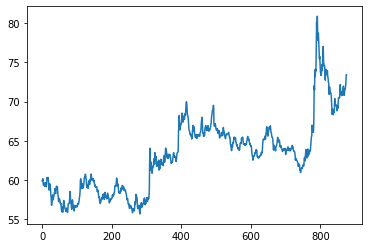

In [102]:
rates.curs.plot()

In [103]:
rates.curs[100:128]

100    56.6747
101    56.5878
102    56.9857
103    57.0020
104    56.9096
105    57.0303
106    57.4437
107    57.7408
108    57.9585
109    58.5786
110    60.0000
111    60.1482
112    59.6564
113    59.0014
114    58.8843
115    59.5415
116    59.0855
117    59.3862
118    58.9695
119    59.2295
120    59.5787
121    60.2426
122    60.3792
123    60.3014
124    60.7397
125    60.6227
126    60.1836
127    59.8806
Name: curs, dtype: float64

In [104]:
rates.curs[128:135]

128    59.0657
129    59.3705
130    59.2418
131    59.0823
132    58.9325
133    59.6572
134    59.8185
Name: curs, dtype: float64

In [105]:
past = 28
future = 7

In [106]:
start = past
end = len(rates)-future


In [107]:
dataframe = []

for day in range(start,end):
    learn_past_data = list(rates.curs[day-past:day]) #28
    learn_future_data = list(rates.curs[day:day+future]) #7
    dataframe.append(learn_past_data+learn_future_data)    
    


In [108]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")
    
past_columns

['past_0',
 'past_1',
 'past_2',
 'past_3',
 'past_4',
 'past_5',
 'past_6',
 'past_7',
 'past_8',
 'past_9',
 'past_10',
 'past_11',
 'past_12',
 'past_13',
 'past_14',
 'past_15',
 'past_16',
 'past_17',
 'past_18',
 'past_19',
 'past_20',
 'past_21',
 'past_22',
 'past_23',
 'past_24',
 'past_25',
 'past_26',
 'past_27']

In [109]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [134]:
usd = pandas.DataFrame(dataframe, columns=past_columns+future_columns)


In [137]:
X = usd[past_columns] #learn

In [139]:
Y = usd[future_columns] #predict


In [113]:
X_train = X[:-10] #задачи учебника
Y_train = Y[:-10] #ответы учебника
# в данном случае использую для того чтобы проверить качество модели по завершению обучения


In [114]:
#Тестовая выборка (экзамен)
X_test = X[-10:]
Y_test = Y[-10:]
# На этом этапе все данные подготовлены



In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
linearreg = LinearRegression()

In [117]:
linearreg.fit(X_train, Y_train) #fit во всем sklearn присутствует всегда

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
first_day=X_test.head(1)

In [142]:
first_day_real = Y_test.head(1)


In [120]:
first_day

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
831,70.752,69.7114,68.9831,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219,...,69.466,69.1284,69.9513,70.4413,70.4413,70.5198,70.4999,71.3409,72.1719,71.2379


In [121]:
prediction = linearreg.predict(first_day)
prediction

array([[71.13428674, 71.08234957, 71.32269032, 71.18007233, 71.14935922,
        71.02164254, 70.82778465]])

In [122]:
first_day_real

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
831,70.88,71.2298,70.7479,71.1275,70.7998,71.231,71.7139


In [123]:
from sklearn.metrics import mean_absolute_error as MAE

In [128]:
MAE(prediction[0], first_day_real.iloc[0]) # функция iloc обращается к фрейму по меткам

0.35344740762915955

In [129]:
import matplotlib.pyplot as plt


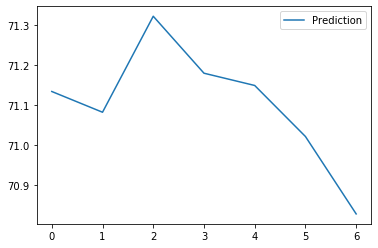

In [144]:
plt.plot(prediction[0],label= "Prediction")
plt.legend()

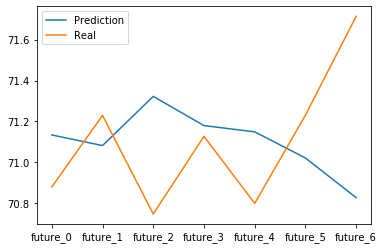

In [131]:
plt.plot(prediction[0],label= "Prediction")
plt.plot(first_day_real.iloc[0], label = "Real")
plt.legend()

MAE = 0.5692402342803392


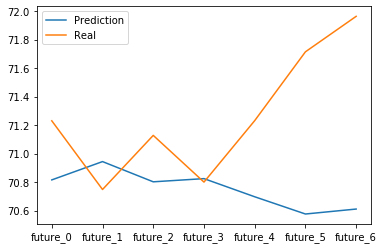

In [151]:
prediction = linearreg.predict([X_test.iloc[1]]) #предугадать по данным второго дня из тестовой выборки
real = Y_test.iloc[1] #данные для сравнения того же дня
mae = MAE(prediction[0],real) # 0 в prediction - поскольку возвращается список в списке
print(f"MAE = {mae}")
plt.plot(prediction[0],label= "Prediction")
plt.plot(real, label = "Real")
plt.legend()

In [152]:
from sklearn.neighbors import KNeighborsRegressor

In [196]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

MAE = 0.29197142857142716


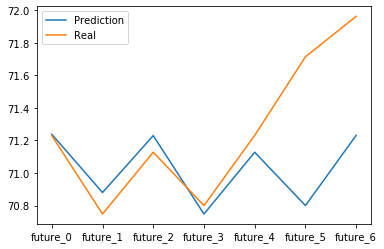

In [201]:
prediction = knr.predict([X_test.iloc[1]]) #предугадать по данным второго дня из тестовой выборки
real = Y_test.iloc[1] #данные для сравнения того же дня
mae = MAE(prediction[0],real) # 0 в prediction - поскольку возвращается список в списке
print(f"MAE = {mae}")
plt.plot(prediction[0],label= "Prediction")
plt.plot(real, label = "Real")
plt.legend()

In [203]:
from sklearn.neural_network import MLPRegressor

In [297]:
mlp = MLPRegressor(max_iter=2000, hidden_layer_sizes=(150,200,150), random_state=42, beta_1=0.921, beta_2=0.999)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.921,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(150, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

MAE = 0.3225198973828124


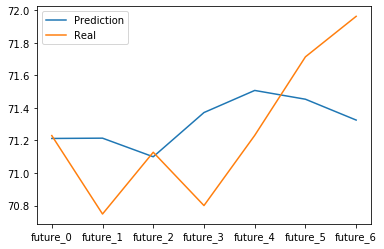

In [303]:
prediction = mlp.predict([X_test.iloc[1]]) #предугадать по данным второго дня из тестовой выборки
real = Y_test.iloc[1] #данные для сравнения того же дня
mae = MAE(prediction[0],real) # 0 в prediction - поскольку возвращается список в списке
print(f"MAE = {mae}")
plt.plot(prediction[0],label= "Prediction")
plt.plot(real, label = "Real")
plt.legend()

In [307]:
from sklearn.tree import DecisionTreeRegressor

In [375]:
dtr = DecisionTreeRegressor(min_samples_split=8, min_samples_leaf=3)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE = 0.348106122448974


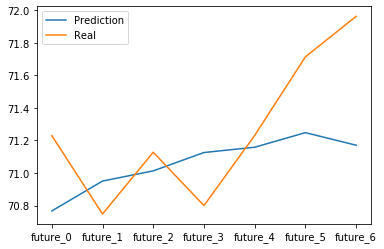

In [376]:
prediction = dtr.predict([X_test.iloc[1]]) #предугадать по данным второго дня из тестовой выборки
real = Y_test.iloc[1] #данные для сравнения того же дня
mae = MAE(prediction[0],real) # 0 в prediction - поскольку возвращается список в списке
print(f"MAE = {mae}")
plt.plot(prediction[0],label= "Prediction")
plt.plot(real, label = "Real")
plt.legend()

In [379]:
from sklearn.dummy import DummyRegressor

In [380]:
dmr = DummyRegressor()
dmr.fit(X_train, Y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

MAE = 8.10675540656696


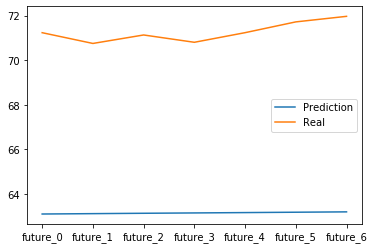

In [381]:
prediction = dmr.predict([X_test.iloc[1]]) #предугадать по данным второго дня из тестовой выборки
real = Y_test.iloc[1] #данные для сравнения того же дня
mae = MAE(prediction[0],real) # 0 в prediction - поскольку возвращается список в списке
print(f"MAE = {mae}")
plt.plot(prediction[0],label= "Prediction")
plt.plot(real, label = "Real")
plt.legend()

In [ ]:
#bad results!!

In [382]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [403]:
gpr = GaussianProcessRegressor(n_restarts_optimizer=0, normalize_y=True)
gpr.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)

MAE = 8.106539766283545


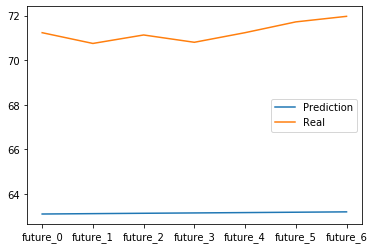

In [404]:
prediction = gpr.predict([X_test.iloc[1]]) #предугадать по данным второго дня из тестовой выборки
real = Y_test.iloc[1] #данные для сравнения того же дня
mae = MAE(prediction[0],real) # 0 в prediction - поскольку возвращается список в списке
print(f"MAE = {mae}")
plt.plot(prediction[0],label= "Prediction")
plt.plot(real, label = "Real")
plt.legend()

In [405]:
#ANOTHER BAD!


In [410]:
from sklearn.linear_model import RANSACRegressor

In [411]:
rsc = RANSACRegressor()
rsc.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

MAE = 1.6114228901946055


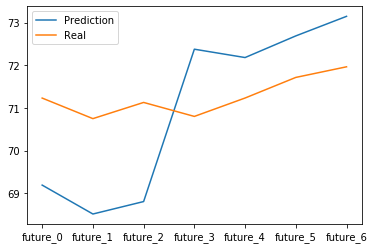

In [412]:
prediction = rsc.predict([X_test.iloc[1]]) #предугадать по данным второго дня из тестовой выборки
real = Y_test.iloc[1] #данные для сравнения того же дня
mae = MAE(prediction[0],real) # 0 в prediction - поскольку возвращается список в списке
print(f"MAE = {mae}")
plt.plot(prediction[0],label= "Prediction")
plt.plot(real, label = "Real")
plt.legend()